## Domain: Data Science and Business Analytics
## Prediction using Supervised Machine Learning
## Task 1: Score Prediction

### Author : Nisha Gupta

### Importing data

In [62]:
## The task of this project is to predict the score when number of hours studied is 9.25 a day
 ## we will first start by importing the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt    

In [63]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [64]:
## importing data
data = pd.read_csv('http://bit.ly/w-data')
 ## check whether the data has been imported correctly
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


### Performing EDA

In [65]:
## Some EDA to check for the authencity of the data
## shape of the data >> to know how many rows and columns are there in the data
print('Shape of the data: ', data.shape,'\n')
    
## to check the data types of the columns
print('Data types of the columns:')
data.dtypes
    
## to check null values in the data
print('Null values of each column:')
data.isnull().sum()

Shape of the data:  (25, 2) 

Data types of the columns:


Hours     float64
Scores      int64
dtype: object

Null values of each column:


Hours     0
Scores    0
dtype: int64

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


Text(0.5, 1.0, 'Hours data')

Text(0.5, 1.0, 'Scores data')

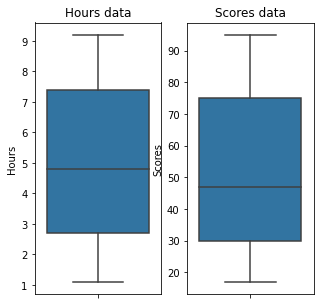

In [66]:
## Determining outliers in the data
#statistically
data.describe()

#visually
f, axs = plt.subplots(1,2, figsize=(5,5))
sns.boxplot(x='Hours',data=data, ax=axs[0], orient='v').set_title('Hours data')
sns.boxplot(x='Scores', data=data, ax=axs[1], orient='v').set_title('Scores data')


### From this analysis we can say that are no outliers present in the data and so we are good to go with further analysis

Text(0.5, 1.0, 'Correlation between Hours and Scores')

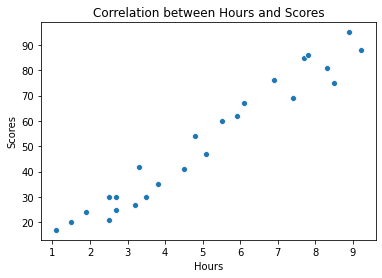

In [67]:
## Now we will first check whether there exists any relation between hours of study and scores obtained
## for that we will create a scatter plot
sns.scatterplot(x='Hours', y='Scores', data=data)
plt.title('Correlation between Hours and Scores')
plt.show()

### There seems to be a linear relation between Number of Hours studied and Scores obtained 

In [68]:
## Now we will go ahead and find out the strength of relation between Hours and Scores
data.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


###  Training, Testing and validating data

In [69]:
## There exists a good positive relation Hours of study and Scores obtained therefore, we can now say that they will perform
##  good while predicting Scores.

# for that we will first check the training and testing scores
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [70]:
x = data.iloc[:, :-1].values  ## x is the predictor variable (Hours)
y = data.iloc[:, 1].values    ## y is the target variable (Scores)

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, random_state=0)

In [71]:
## Since our data is not dynamically disbursed we do not need to normalize our data and we can directly use a simple Linear
## model
lr = LinearRegression()

model = lr.fit(x_train, y_train)
print('Train Model Score is ', round((model.score(x_train, y_train)*100),3))

Train Model Score is  94.85


### Error Bar

<ErrorbarContainer object of 3 artists>

Text(0.5, 1.0, 'Error between Actual Scores and Predicted Scores')

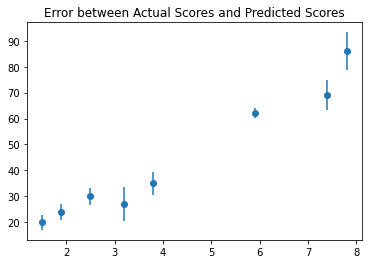

In [72]:
## Making predictions for the test set
y_pred = lr.predict(x_test)

## creating an error graph to visually understand the difference between acutal and predicted values
y_error = y_test-y_pred

plt.errorbar(x_test, y_test, yerr = y_error, fmt='o')
plt.title('Error between Actual Scores and Predicted Scores')
plt.show()

### The error shows the error that is the difference between actual and preicted values. And here we do not have high error bars that means our prediction model is goo enough.

In [73]:
##Comparatively, we can check the values from this dataframe also
pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})

,Actual,Predicted
0,20,17.053665
1,27,33.694229
2,69,74.806209
3,30,26.842232
4,62,60.123359
5,35,39.567369
6,24,20.969092
7,86,78.721636


In [74]:
##  Now we check the accuracy of test set
from sklearn.metrics import r2_score
print('Accuracy of test set is ', round((r2_score(y_test, y_pred)*100),2))

Accuracy of test set is  95.68


### Predicting score when number of hours studied is 9.25 a day

In [75]:
predict_hour = np.array(9.25).reshape(1,-1)
predicted_score = float(lr.predict(predict_hour))
print('Score obtined after studying 9.25 hours a day is ', round(predicted_score,2))

Score obtined after studying 9.25 hours a day is  92.92
